<a href="https://colab.research.google.com/github/np03cs4s250092-commits/5CS037/blob/master/Rejina_Rana_Magar_Worksheet10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1: Sentiment Analysis using Naive Bayes

In [ ]:
#Part 1:
#1. Load the dataset and preprocess the reviews.
#a. Convert all text to lowercase.
#b. Remove non-alphabetic characters (punctuation).
#c. Tokenize the reviews and remove common stopwords.
#d. Apply stemming to reduce words to their root form.# Dataset: IMDB Movie Reviews
import pandas as pd # For data handling
import numpy as np # For numerical operations
import re # For text cleaning
import matplotlib.pyplot as plt # For visualization

In [ ]:
# Natural Language Processing libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
# Download NLTK resources (run once)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')

In [ ]:
# Display first few rows to understand the dataset
print(dataset.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
# Initialize stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [ ]:
# Function to clean text
def preprocess_text(text):
    text = text.lower() # Convert text to lowercase
    text = re.sub('[^a-z]', ' ', text) # Remove punctuation & numbers
    words = text.split() # Tokenize text
    words = [stemmer.stem(word) for word in words # Apply stemming
            if word not in stop_words] # Remove stopwords
    return ' '.join(words)

In [45]:
# Apply preprocessing to reviews
dataset['cleaned_review'] = dataset['review'].apply(preprocess_text)

In [ ]:
#Encode sentiment labels
# positive → 1, negative → 0
dataset['sentiment'] = dataset['sentiment'].map({'positive': 1, 'negative': 0})

In [ ]:
#Split dataset into training and testing sets (80% / 20%)
X = dataset['cleaned_review']
y = dataset['sentiment']


X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)

In [ ]:
#Bag-of-Words using CountVectorizer
vectorizer = CountVectorizer(max_features=5000)
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [ ]:
#Train Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)

MultinomialNB()

In [ ]:
#Make predictions
y_pred = nb_model.predict(X_test_bow)
y_prob = nb_model.predict_proba(X_test_bow)[:, 1]

In [ ]:
#Model Evaluation


# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8494


In [ ]:
#Precision, Recall, F1-score
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      4961
           1       0.85      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[4239  722]
 [ 784 4255]]


In [ ]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.912517937591323


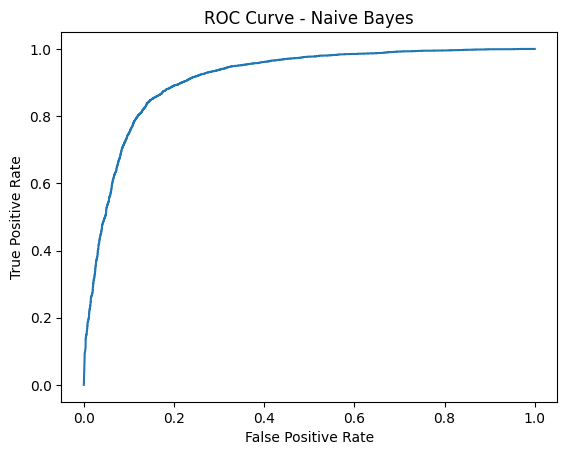

In [ ]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.show()

# Exercise 2: Feature Selection using RFE

In [ ]:
#Part 2:
# 1. Evaluate the performance of the model using the following metrics:
# a. Accuracy
# b. Precision, Recall, and F1-score
# c. Confusion Matrix
# d. ROC-AUC Score# Dataset: Breast Cancer Prognostic Dataset
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [ ]:
cancer = load_breast_cancer()


X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

In [ ]:
#Exploratory Data Analysis (EDA)
print("Dataset Shape:", X.shape)
print("\nSummary Statistics:\n", X.describe())
print("\nMissing Values:\n", X.isnull().sum())

Dataset Shape: (569, 30)

Summary Statistics:
        mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380   

In [ ]:
#Train-Test Split (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)

In [ ]:
#Logistic Regression model
log_reg = LogisticRegression(max_iter=5000)

In [ ]:
#Apply Recursive Feature Elimination (Top 5 Features)
rfe = RFE(estimator=log_reg, n_features_to_select=5)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=5000), n_features_to_select=5)

In [ ]:
# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected Top 5 Features:\n", selected_features)

Selected Top 5 Features:
 Index(['mean radius', 'texture error', 'worst radius', 'worst compactness',
       'worst concavity'],
      dtype='object')


In [ ]:
# Feature ranking
feature_ranking = pd.DataFrame({
'Feature': X.columns,
'Ranking': rfe.ranking_
}).sort_values(by='Ranking')


print("\nFeature Ranking:\n", feature_ranking)

In [ ]:
# Visualize feature ranking
plt.figure(figsize=(8, 6))
plt.barh(feature_ranking['Feature'], feature_ranking['Ranking'])
plt.xlabel('Feature Ranking')
plt.ylabel('Features')
plt.title('RFE Feature Ranking')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#Train model using selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


log_reg.fit(X_train_selected, y_train)
y_pred_selected = log_reg.predict(X_test_selected)
y_prob_selected = log_reg.predict_proba(X_test_selected)[:, 1]

In [ ]:
#Model Evaluation (Selected Features)
print("\nModel Performance with Selected Features")
print("Accuracy:", accuracy_score(y_test, y_pred_selected))
print(classification_report(y_test, y_pred_selected))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_selected))

In [ ]:
#Compare with all features
log_reg.fit(X_train, y_train)
y_pred_all = log_reg.predict(X_test)
y_prob_all = log_reg.predict_proba(X_test)[:, 1]
print("\nModel Performance with All Features")
print("Accuracy:", accuracy_score(y_test, y_pred_all))
print(classification_report(y_test, y_pred_all))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_all))

In [ ]:
#Experiment with different feature counts (Top 3, Top 7)
for n in [3, 7]:
    rfe_n = RFE(estimator=log_reg, n_features_to_select=n)
    rfe_n.fit(X_train, y_train)
    selected = X.columns[rfe_n.support_]


    log_reg.fit(X_train[selected], y_train)
    y_pred_n = log_reg.predict(X_test[selected])


    print(f"\nPerformance with Top {n} Features")
    print("Accuracy:", accuracy_score(y_test, y_pred_n))
    print(classification_report(y_test, y_pred_n))


Performance with Top 3 Features
Accuracy: 0.8070175438596491
              precision    recall  f1-score   support

           0       0.89      0.56      0.69        43
           1       0.78      0.96      0.86        71

    accuracy                           0.81       114
   macro avg       0.84      0.76      0.77       114
weighted avg       0.82      0.81      0.79       114


Performance with Top 7 Features
Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
"""2. Discuss how feature selection affects model performance.

Feature selection improves model efficiency and generalization by removing irrelevant features while preserving predictive performance.
"""